# Introduction

What is epilepsy

Epilepsy is the condition in which there is sudden burst of electric waves in the brain causes the seizure or sometimes it is called the fits which is nothing but the uncontrolled shaking or suddenly becoming stiff. There are many treatment for the epilipsy such as providing the proper medication to the patient called the  anti-epileptic drugs.

In order to treat or find out more about this disease different electroencephalogram (EEG) is used to find the brain activity . 

# Epileptic Seizure Recognition Data Set

In this report we will going to analyze the dataset featuring epileptic seizure detection[1]. 


*   Data Set characterstics : Multivariate.
*   Number of Instances: 11500
*   Number of Attributes : 179

Characterstic of the Attribute : The time frame used to record the brain activity is 23.6 secounds. The corresponding time-series is sampled into 4097 data points. So each data point that we get represents the EEG recording at a different point in time.

The data is divided and shuffled into 4097 data points and 23 chunks. so In a way each chunk which is 178 data points(number of columns) for a single secound has a data point of 4097 into 23 chunks and each of those chunk contains 178 data points for one second. In order to calculate the total peice of information we have multiply 23 * 500 = 11500 pieces of information or number of rows. 

The last column of the dataset contains the information of the label that we will going to get which ranges from 1 to 5 where :

1 - Recording of seizure activity
2 - Recording of EEG from the loction of tumor
3 - Recording the EEG activity from the healthy part of the brain area.
4 - Eyes closed, means when EEG was recorded the eyes of the patient was cloased.
5 - eyes open, means when EEG was recorded the eyes of the patient was open.

The important part of all this features is that we need to focus on only two types of classess, that are when the seizure is occured which are labelled under '1' and all the other label can be considered as the sizure not occured which includes '2','3','4' and '5'. 

Our task is to build the model using the machine learning and artificial intelligence to predict if the seizure is occured or not based on the given dataset.

link to dataset : http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

Refrences:[1] Andrzejak RG, Lehnertz K, Mormann F, Rieke C, David P, Elger CE. Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: dependence on recording region and brain state. Phys Rev E Stat Nonlin Soft Matter Phys. 2001 Dec;64(6 Pt 1):061907. doi: 10.1103/PhysRevE.64.061907. Epub 2001 Nov 20. PMID: 11736210.




In [38]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('/content/Epileptic Seizure Recognition.csv')

In [40]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [41]:
data.describe()
#finding out the summary of the dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [42]:
data.shape

(11500, 180)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [44]:
data.describe(include=object)

,Unnamed
count,11500
unique,11500
top,X21.V1.791
freq,1


In [45]:
null_values = data.isnull().sum()
null_values.to_numpy() #as we can see that there are no null values present on the dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [46]:
data_1 = data.copy()

In [47]:
data_1.drop(['Unnamed','y'],axis=1,inplace=True)

In [48]:
data_1 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [49]:
data['y'].value_counts()


4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

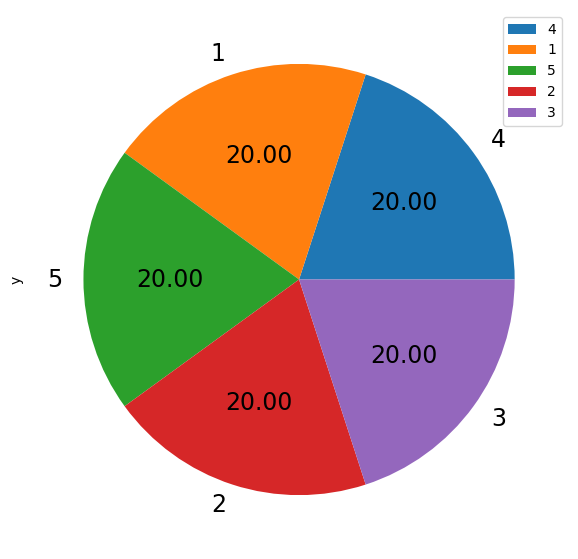

In [50]:
#visualizing the only categorical column present in the dataset.
values = data['y'].value_counts()
plt.figure(figsize=(7,7))
values.plot(kind='pie',fontsize=17, autopct='%.2f')
plt.legend(loc="best")
plt.show()
#it means all the categorical values in our dataset contains the equal amoung of balance.

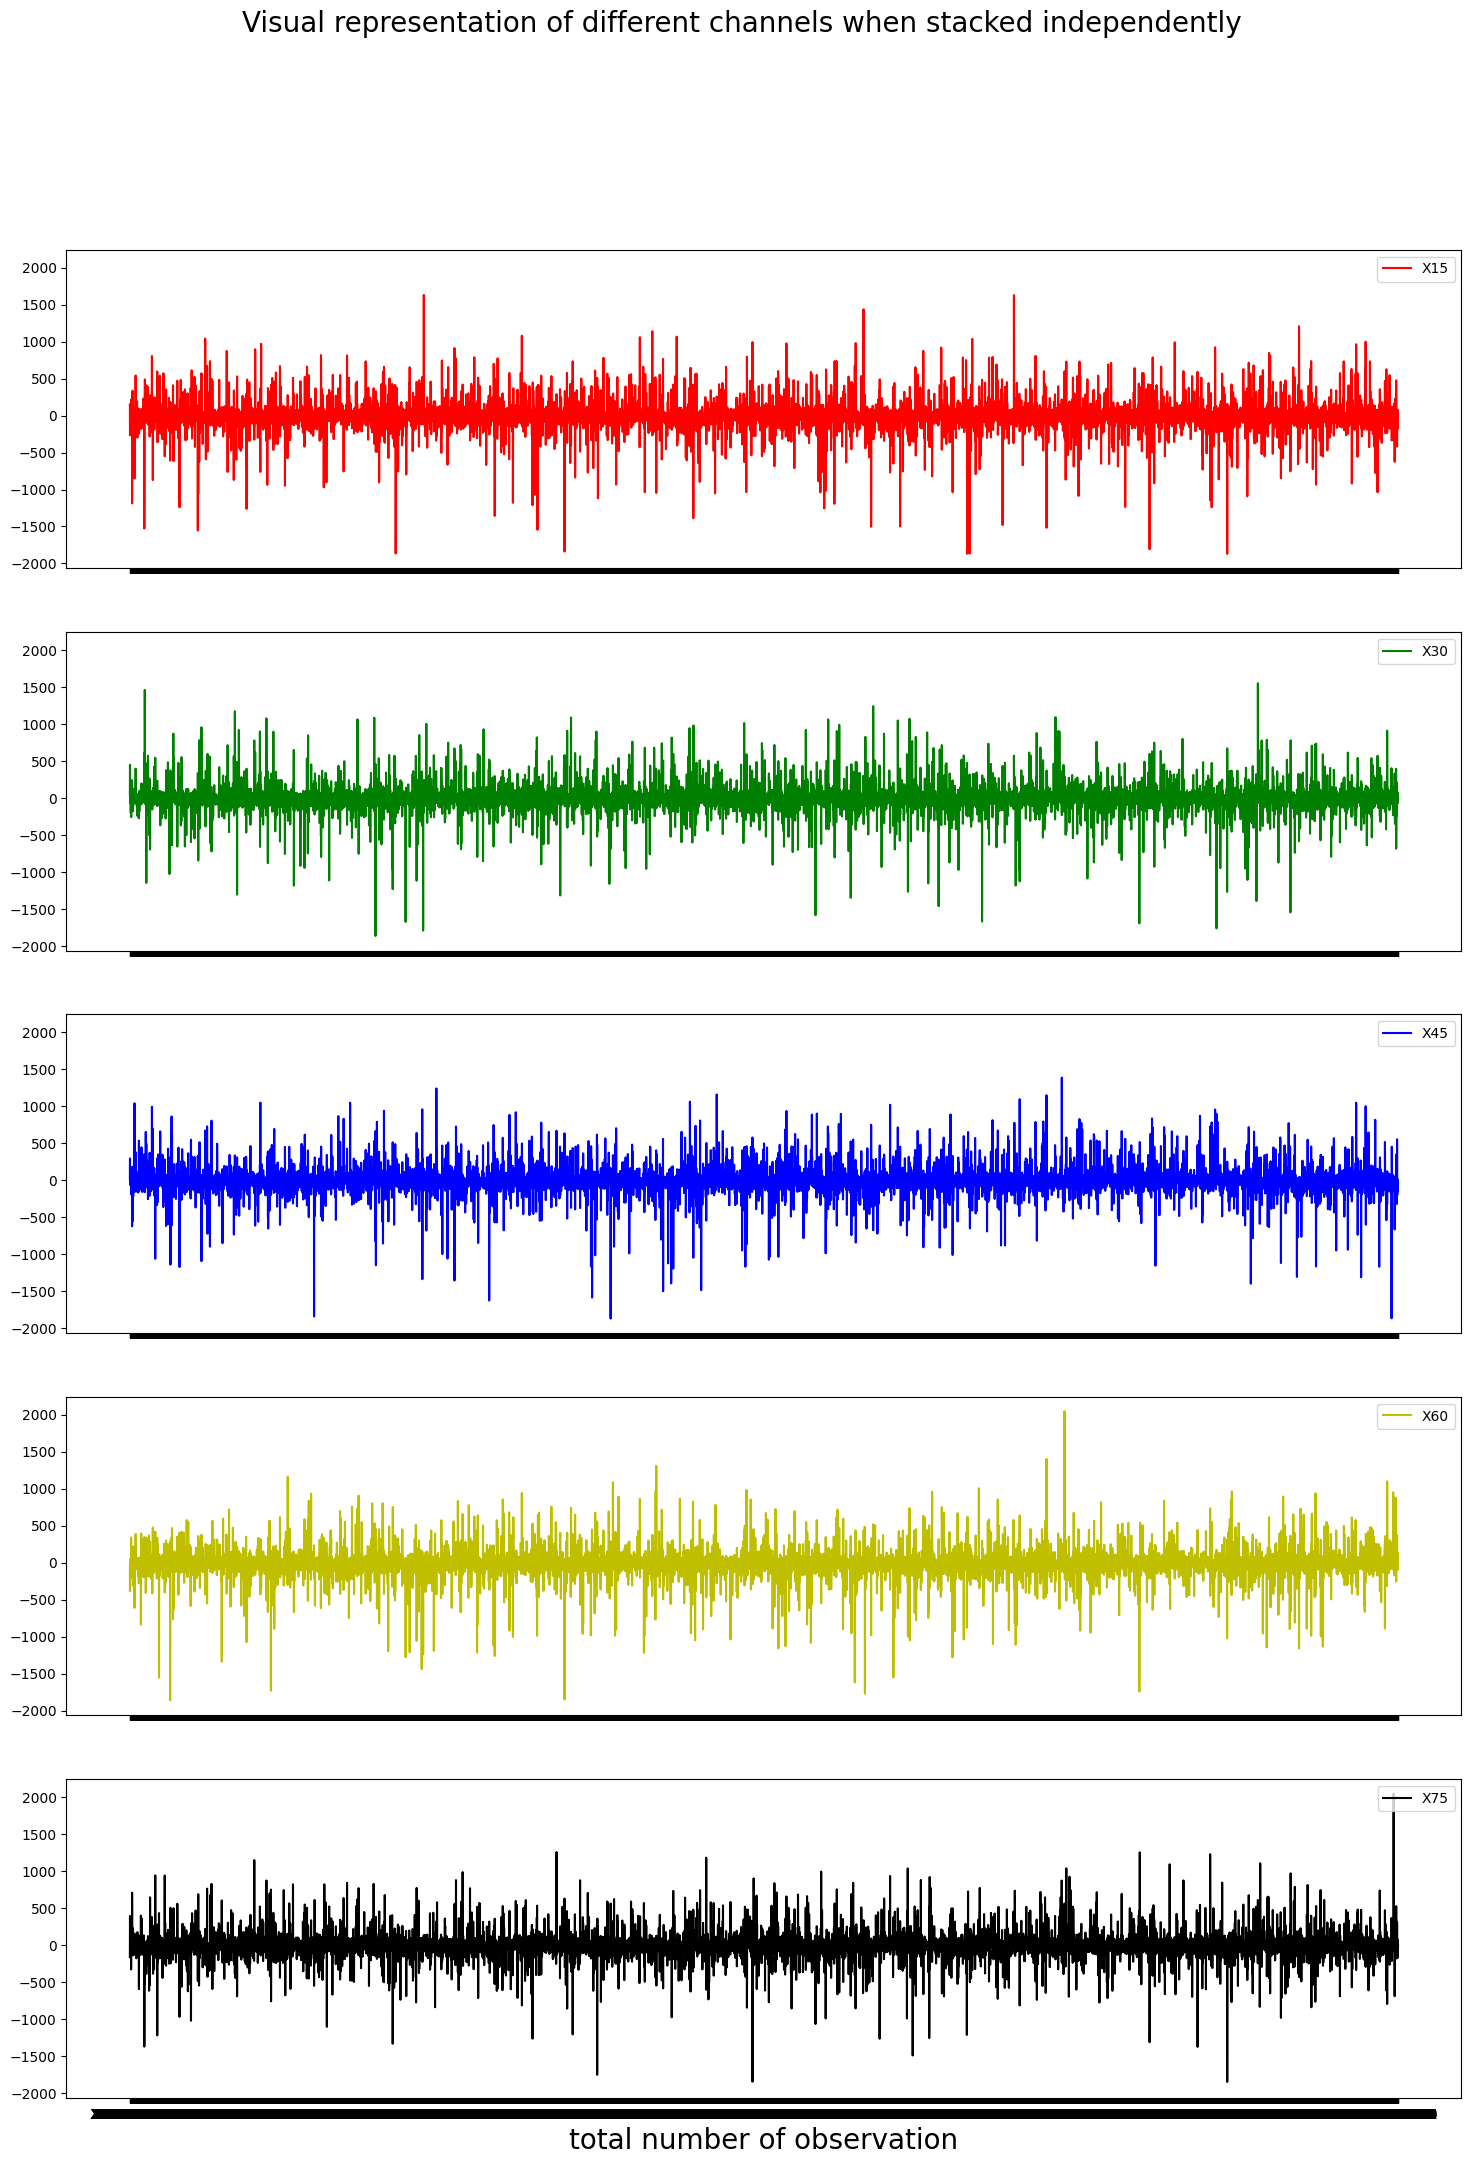

In [51]:
# plot these features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["X15","X30","X45","X60","X75"]
colors = ["r","g","b",'y',"k"]
fig.suptitle('Visual representation of different channels when stacked independently', fontsize = 20)
# loop over axes
for i,ax in enumerate(axs):
  axs[i].plot(data.iloc[:,0],data[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('total number of observation', fontsize = 20)
plt.show()

we can say that relatively the pattern that we got from the waves is nearly same,there is some difference we can see in the X15 and X75. It's hard to distinguish the difference by visual inspection when viewed seperately.

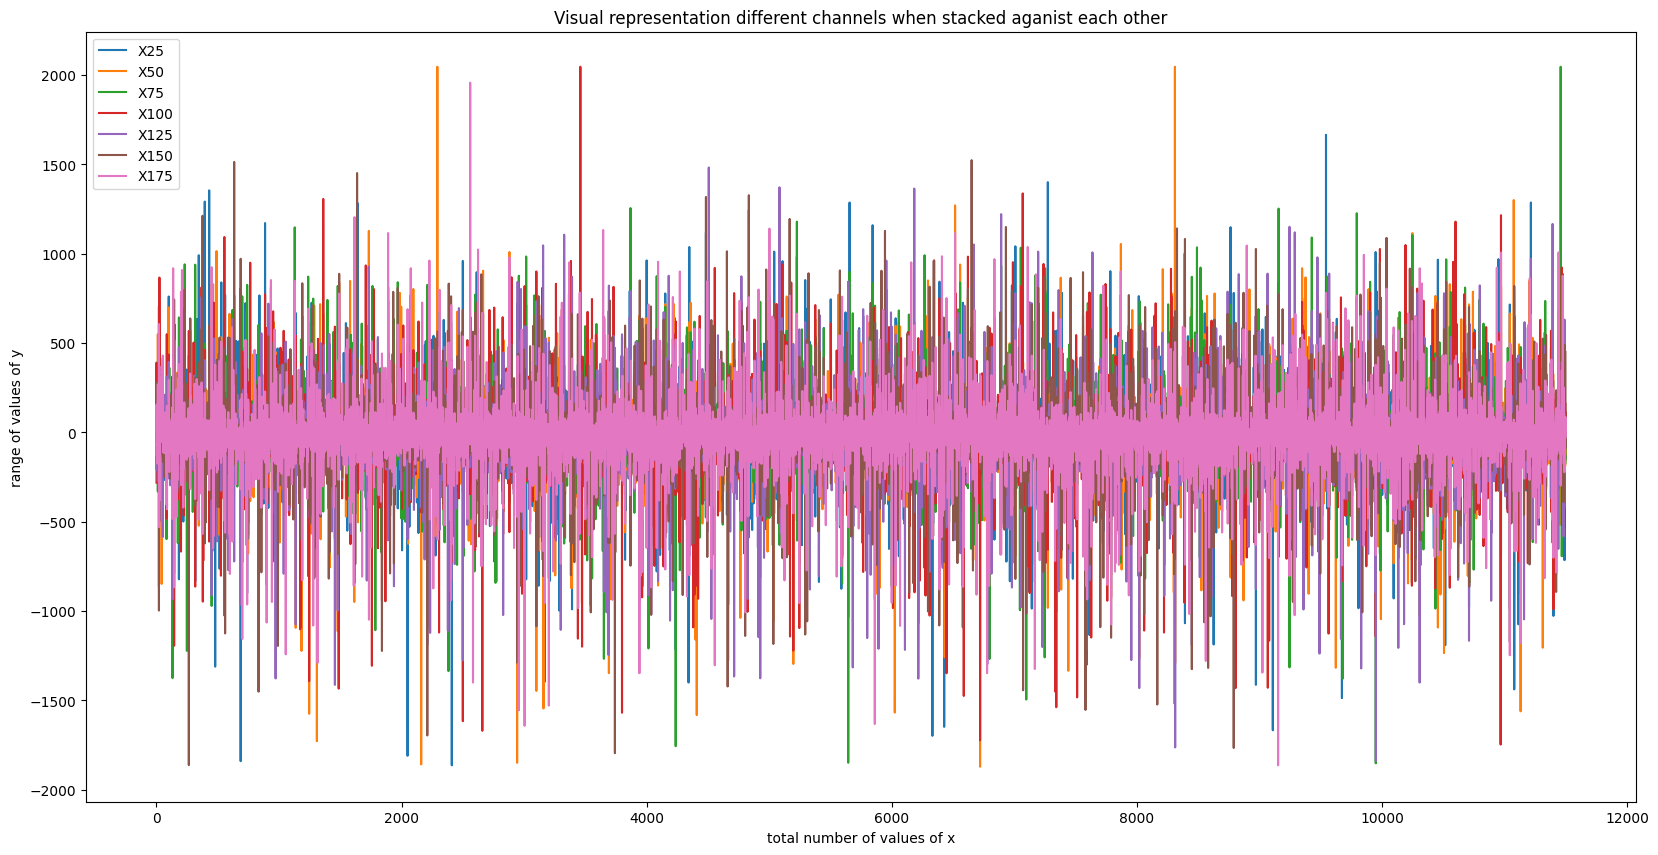

In [52]:
#plt.figure(figsize=(10,10))
#this can help of provide us the general idea of how the waves are behaving 
#fig, axs = plt.subplots(1, sharex=True, sharey=True)
plt.rcParams["figure.figsize"] = (20, 10)
data.loc[:,::25].plot()
plt.title("Visual representation different channels when stacked aganist each other")
plt.xlabel("total number of values of x")
plt.ylabel("range of values of y")
plt.show()

Here we have plotted all the waves in the same chart just have an idea how they differ from each other by the value of frequency. Though we can find most of them overlap each other.

# Finding out the Correlation Matrix

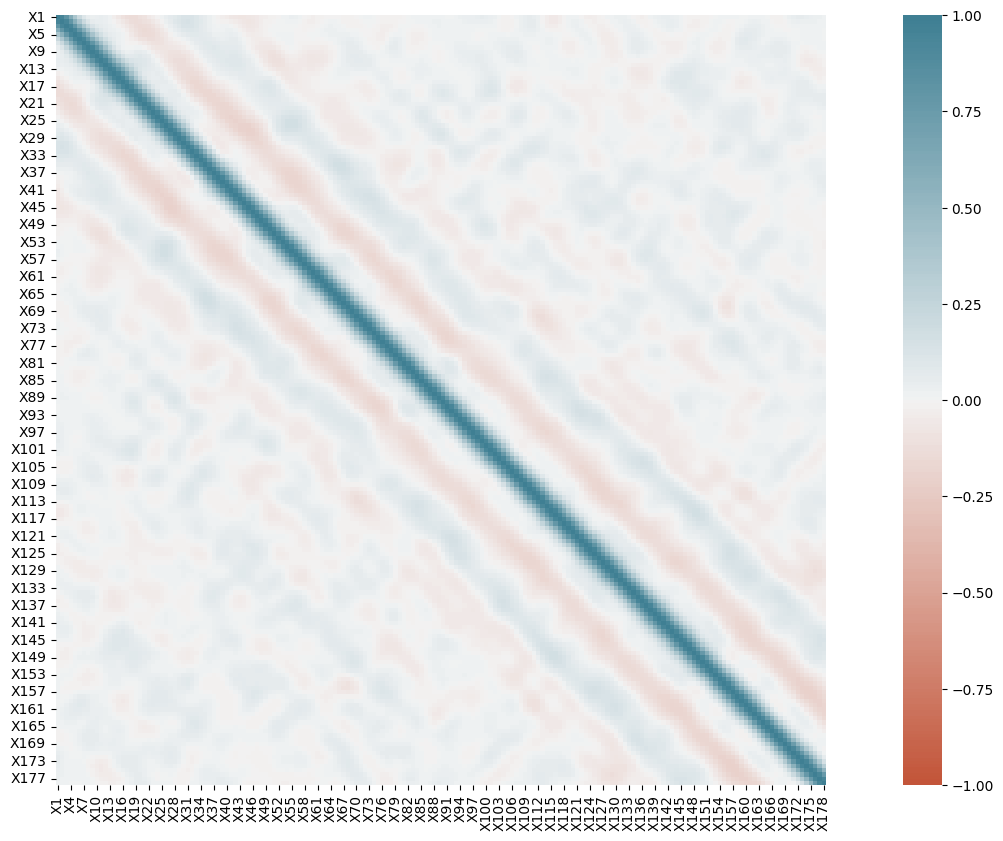

In [53]:
corr = data_1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

We cannot able to find any major relative correlation between different waves, as there are no very dark blue dots on the matrix which shows the high correlation.

# Solving the class imbalance problem

In [54]:
data_2 = data.drop(["Unnamed"],axis=1).copy()

In [55]:
data_2["Output"]= data_2.y == 0

In [56]:
data_2["Output"] = data_2["Output"].astype(int)

In [57]:
data_2.y.value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

In [58]:
data_2['y'] = data_2['y'].replace([2,3,4,5],0)

In [59]:
data_2.y.value_counts() #we can see there is a mojor class imbalance problem in our dataset

0    9200
1    2300
Name: y, dtype: int64

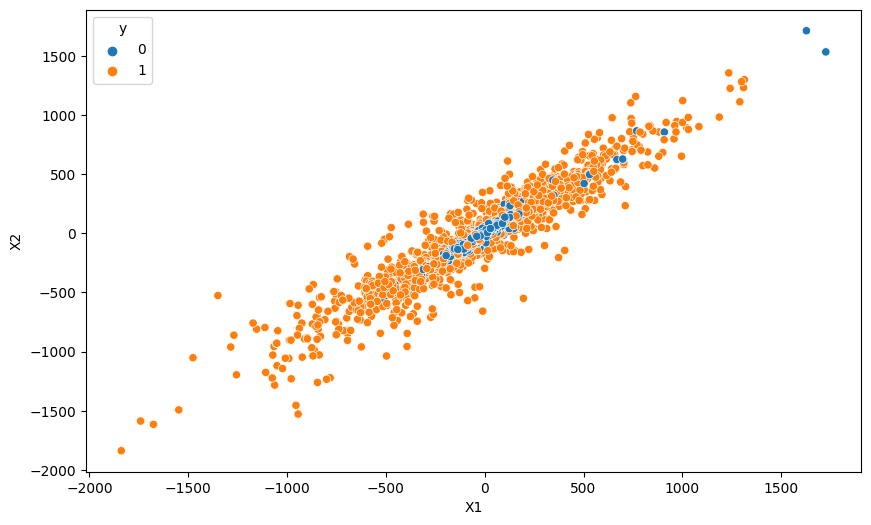

In [60]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=data_2)
plt.show()
#we can see the clear class imbalance problem present here

In [61]:
data_2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Output
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,0,0
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,0
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,0,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,0,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,0,0


In [62]:
data_2.y.value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [63]:
X  = data_2.drop(['Output','y'], axis=1)
y = data_2['y']

Here we will be using the SMOTE techniques to remove the class imbalance problem from our dataset. We can see that in the output variable we have more number of class of one variable than other, it will create a problem when we will be using different machine-learning and AL algorithms they tends to more biased towards particular because of it's high presence. In order to tackle this bias we will use the SMOTE techniques, so that we can balance the number of variable in our response variable.


Here we will be using the 

In [64]:
counter = Counter(y)
#finding out the 
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(X, y)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 9200, 1: 2300})
After Counter({0: 9076, 1: 9050})


## Model Building

In [65]:
#so we will start with dividing it into two parts/because with this method we cannot divide it into three parts
X_train, X_test, y_train, y_test = train_test_split(X_train1,y_train1,test_size=0.4,random_state=42)

#now we will be dividing it into further to get the validation set
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#now we will going to scale the dataset
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [67]:
print("The shape of the training set is :{}".format(X_train.shape))
print("The shape of the testing set is :{}".format(X_test.shape))
print("The shape of the validation set is :{}".format(X_val.shape))

The shape of the training set is :(10875, 178)
The shape of the testing set is :(3626, 178)
The shape of the validation set is :(3625, 178)


# Logistic Regression

In [68]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [69]:
from sklearn import metrics
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_val)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_val, y_pred))

0.6510344827586206


In [70]:
y_train_re = y_train.values.reshape(-1,1)
y_val_re = y_val.values.reshape(-1,1)

In [71]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train_re)
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_val)

# compare actual response values (y_test) with predicted response values (y_pred)
print("The accuracy score of the model on the validation data is:{}.".format(metrics.accuracy_score(y_val_re, y_pred)*100))

#fiding out the confusion matrix of the dataset
Myconfusion = metrics.confusion_matrix(y_pred,y_val_re)
print("This is the required confusion matrix of the model:{}.".format(Myconfusion))

The accuracy score of the model on the validation data is:65.10344827586206.
This is the required confusion matrix of the model:[[1423  894]
 [ 371  937]].


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69      1794
           1       0.72      0.51      0.60      1831

    accuracy                           0.65      3625
   macro avg       0.67      0.65      0.64      3625
weighted avg       0.67      0.65      0.64      3625



In [73]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = logreg.predict(X_val)
#y_pred = y_pred[:, 1]
logit_fpr, logit_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
logit_auc = metrics.roc_auc_score(y_val, y_pred)

# K-nearest neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 100)
knn.fit(X_train,y_train)

y_valid_preds = knn.predict_proba(X_val)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))
print(classification_report(y_val,y_pred))


Accuracy with K-NN: 65.10%
              precision    recall  f1-score   support

           0       0.61      0.79      0.69      1794
           1       0.72      0.51      0.60      1831

    accuracy                           0.65      3625
   macro avg       0.67      0.65      0.64      3625
weighted avg       0.67      0.65      0.64      3625



In [75]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = knn.predict(X_val)
#y_pred = y_pred[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
knn_auc = metrics.roc_auc_score(y_val, y_pred)

# Support Vector Machine

In [76]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_val)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))


# calculate the FPR and TPR for all thresholds of the classification
probs = svm.predict_proba(X_val)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_val, probs)
svm_auc = metrics.roc_auc_score(y_val, probs)

Accuracy with SVM: 65.88%


In [77]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = svm.predict(X_val)
#y_pred = y_pred[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
svm_auc = metrics.roc_auc_score(y_val, y_pred)

# Stochastic Gradient Descend

In [78]:
from sklearn.linear_model import SGDClassifier
stochg = SGDClassifier(loss='log',alpha=0.1,random_state=42)
stochg.fit(X_train,y_train)

print("Stochastic Gradient Descend")
print('Accuracy with stochg is:{0:.2f}%.'.format(metrics.accuracy_score(y_pred, y_val) * 100))

Stochastic Gradient Descend
Accuracy with stochg is:65.88%.


In [79]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = stochg.predict(X_val)
#y_pred = y_pred[:, 1]
stochg_fpr, stochg_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
stochg_auc = metrics.roc_auc_score(y_val, y_pred)

# Naive Bayes Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,y_train)

print("Naive Bayes")
print('Accuracy with naive is:{0:.2f}%.'.format(metrics.accuracy_score(y_pred, y_val) * 100))

Naive Bayes
Accuracy with naive is:65.74%.


In [81]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = naive.predict(X_val)
#y_pred = y_pred[:, 1]
naive_fpr, naive_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
naive_auc = metrics.roc_auc_score(y_val, y_pred)

# Decision Trees (DTs)

In [82]:
#now checking the accuracy on the decision tree classification
from sklearn import tree
tree_eeg = tree.DecisionTreeClassifier()
tree = tree_eeg.fit(X_train,y_train)
#predicting
y_pred = tree.predict(X_val) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_val)* 100
#print  the accuracy
print("Accuracy of the model by using the decision tree algorithm : {0:.2f}%".format(precision))

Accuracy of the model by using the decision tree algorithm : 92.06%


In [84]:
tree_eeg

DecisionTreeClassifier()

# **Saving the desicion tree model weights in pickle file**

In [85]:
pickle.dump(tree, open('model.pkl', 'wb'))

**Loading the descion tree Model from Pickle**

In [86]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

In [87]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = tree.predict(X_val)
#y_pred = y_pred[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
tree_auc = metrics.roc_auc_score(y_val, y_pred)

# Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10,random_state=69)
random.fit(X_train,y_train)

#predicting
y_pred = random.predict(X_val) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_val)* 100
#print  the accuracy
print("Accuracy of the model by using the random algorithm : {0:.2f}%".format(precision))


Accuracy of the model by using the random algorithm : 96.47%


**Saving the Random forest model weights in pickle file**

In [89]:
pickle.dump(random, open('RF_model.pkl', 'wb'))

**Loading the random forest Model from Pickle**

In [90]:
pickled_model = pickle.load(open('RF_model.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])

In [91]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = random.predict(X_val)
#y_pred = y_pred[:, 1]
random_fpr, random_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
random_auc = metrics.roc_auc_score(y_val, y_pred)

# Extra-trees classifier

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier(bootstrap=False,criterion="entropy",max_features=1.0,
                             min_samples_leaf=3,min_samples_split=20,n_estimators=100)

extra.fit(X_train,y_train)

print("Extra Trees Classifier")
#predicting
y_pred = extra.predict(X_val) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_val)* 100
#print  the accuracy
print("Accuracy of the model by using the extra algorithm : {0:.2f}%".format(precision))


Extra Trees Classifier
Accuracy of the model by using the extra algorithm : 98.15%


In [93]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = extra.predict(X_val)
#y_pred = y_pred[:, 1]
extra_fpr, extra_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
extra_auc = metrics.roc_auc_score(y_val, y_pred)

# Gradient Boosting for classification.

In [94]:
from pandas.core.common import random_state
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(
    n_estimators=100,learning_rate=1.0,max_depth=6,random_state=69)

gradient.fit(X_train,y_train)

print("Gradient Boosting for classification.")
#predicting
y_pred = gradient.predict(X_val) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_val)* 100
#print  the accuracy
print("Accuracy of the model by using the gradient algorithm : {0:.2f}%".format(precision))



Gradient Boosting for classification.
Accuracy of the model by using the gradient algorithm : 98.10%


In [95]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = gradient.predict(X_val)
#y_pred = y_pred[:, 1]
gradient_fpr, gradient_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
gradient_auc = metrics.roc_auc_score(y_val, y_pred)

# XGBoost

In [96]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()

xgbc.fit(X_train,y_train)

print("XGBoost")
#predicting
y_pred = xgbc.predict(X_val) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_val)* 100
#print  the accuracy
print("Accuracy of the model by using the xgbc algorithm : {0:.2f}%".format(precision))

XGBoost
Accuracy of the model by using the xgbc algorithm : 98.34%


In [97]:
# calculate the FPR and TPR for all thresholds of the classification
y_pred = xgbc.predict(X_val)
#y_pred = y_pred[:, 1]
xgbc_fpr, xgbc_tpr, thresholds = metrics.roc_curve(y_val, y_pred)
xgbc_auc = metrics.roc_auc_score(y_val, y_pred)

# Plotting the ROC Curve

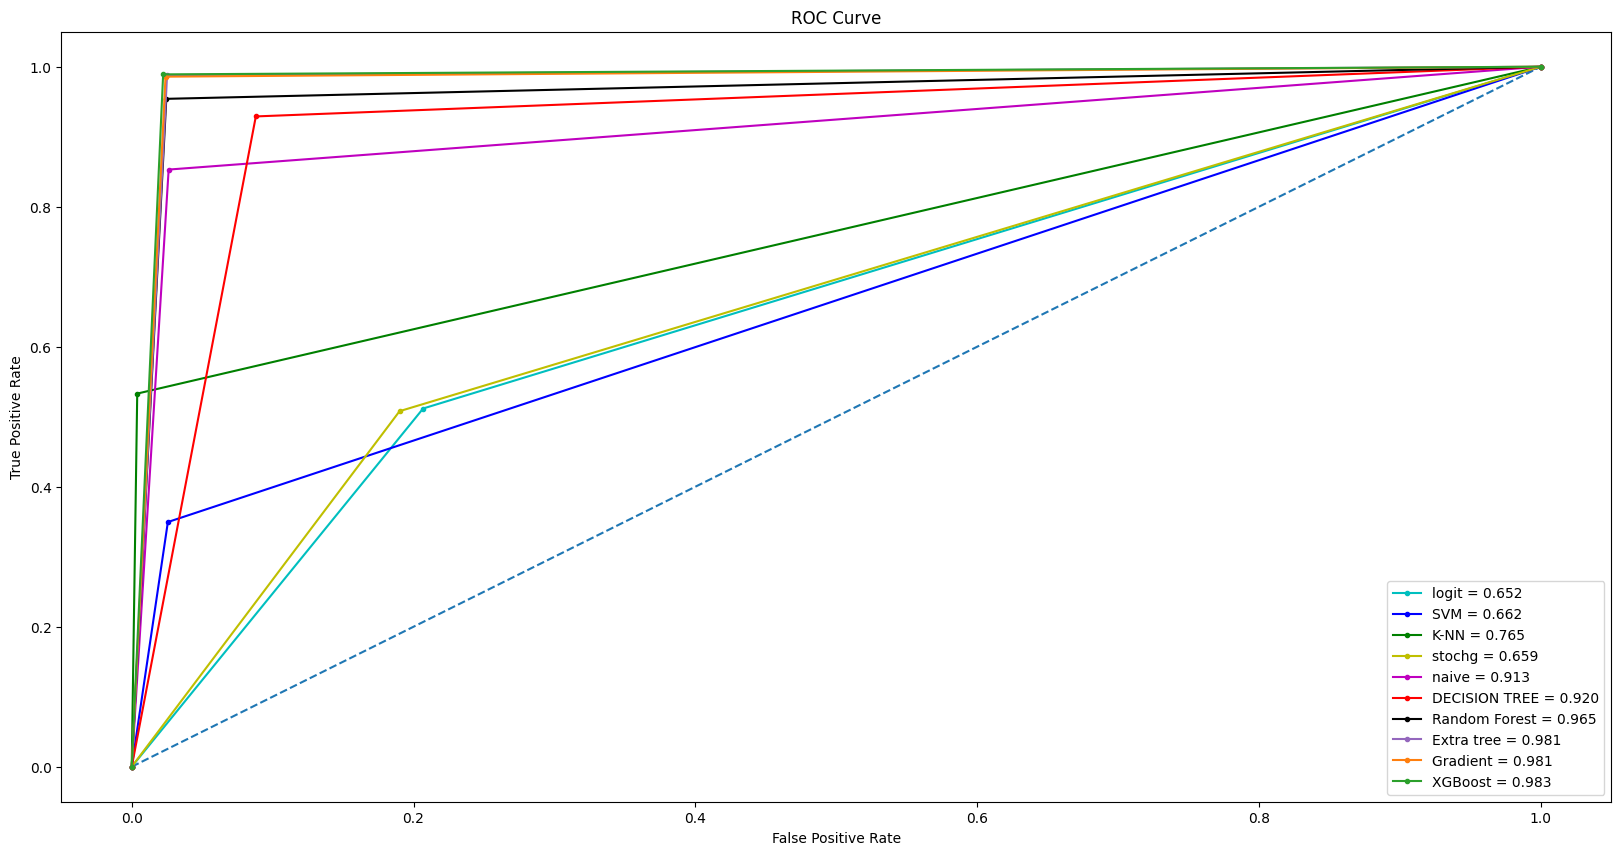

In [98]:
#ROC CURVE
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_fpr, logit_tpr, 'c', marker='.', label = 'logit = %0.3f' % logit_auc )
plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )
plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-NN = %0.3f' % knn_auc)
plt.plot(stochg_fpr, stochg_tpr, 'y', marker='.', label = 'stochg = %0.3f' % stochg_auc)
plt.plot(naive_fpr, naive_tpr, 'm', marker='.', label = 'naive = %0.3f' % naive_auc)
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.plot(random_fpr, random_tpr, 'k', marker='.',label = 'Random Forest = %.3f' % random_auc)
plt.plot(extra_fpr, extra_tpr, 'C4', marker='.',label = 'Extra tree = %.3f' % extra_auc)
plt.plot(gradient_fpr, gradient_tpr, 'C1', marker='.',label = 'Gradient = %.3f' % gradient_auc)
plt.plot(xgbc_fpr, xgbc_tpr, 'C2', marker='.',label = 'XGBoost = %.3f' % xgbc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Deep Learning

In [99]:
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,LSTM,Dense,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import callbacks

Building the model


1.   Initialising the ANN
2.   Defining by adding layers
3.   Compiling the ANN
4.   Train the ANN





In [100]:
X_train.shape

(10875, 178)

In [101]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

#intialising the nn
model = Sequential()

#layers
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=178))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='relu'))

#finding out the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5728      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [102]:
#compiling the ann
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [103]:
#training the model
model_train = model.fit(X_train,y_train,batch_size=32,epochs=500,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/500
272/272 [==============================] - 2s 3ms/step - loss: 0.7148 - accuracy: 0.7966 - val_loss: 0.2321 - val_accuracy: 0.9591
Epoch 2/500
272/272 [==============================] - 1s 2ms/step - loss: 0.2058 - accuracy: 0.9389 - val_loss: 0.1854 - val_accuracy: 0.9655
Epoch 3/500
272/272 [==============================] - 1s 2ms/step - loss: 0.1761 - accuracy: 0.9553 - val_loss: 0.2157 - val_accuracy: 0.9683
Epoch 4/500
272/272 [==============================] - 1s 2ms/step - loss: 0.1763 - accuracy: 0.9605 - val_loss: 0.1826 - val_accuracy: 0.9559
Epoch 5/500
272/272 [==============================] - 1s 2ms/step - loss: 0.1872 - accuracy: 0.9608 - val_loss: 0.2363 - val_accuracy: 0.9641
Epoch 6/500
272/272 [==============================] - 1s 2ms/step - loss: 0.1689 - accuracy: 0.9636 - val_loss: 0.1923 - val_accuracy: 0.9660
Epoch 7/500
272/272 [==============================] - 1s 2ms/step - loss: 0.1556 - accuracy: 0.9585 - val_loss: 0.2118 - val_accuracy: 0.9651

In [104]:
predictions = model.predict(X_val)
pred_labels =np.round(predictions)       
score = accuracy_score(y_val,pred_labels)
conf_mx = confusion_matrix(y_val, pred_labels)

114/114 [==============================] - 0s 1ms/step


# Model selection

In [105]:
#hence we have seen how different models have performed in our dataset, now we will going to select the best performing model out of all the dataset
#the best performing model that we got is the Gradient Boosting for classification. with the Accuracy of the model by using the gradient algorithm : 98.34%.
#so finally we will testing it on our test dataset, on which we have not done any model training and testing.
print("XGBoost")
#predicting
y_pred = xgbc.predict(X_test) 
#Evaluating the model
precision = metrics.accuracy_score(y_pred,y_test)* 100
#print  the accuracy
print("Accuracy of the model by using the xgbc algorithm : {0:.2f}%".format(precision))

XGBoost
Accuracy of the model by using the xgbc algorithm : 98.43%


# Hence we are getting an accuracy of 95.53% , we can confidently say that, we have the chances of correctly prediction the diseases 95.54%.